In [68]:
import sys
sys.path.append('../')
import python.edge as edge 
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

In [110]:
file= '../data/interim/spim2/c200.jpg'
img = cv2.imread(file,0)
app1 = cv2.imread(file)
app2 = app1.copy()
filtered = cv2.bilateralFilter(img, 9,350,350)
edgeShape = edge.edge(filtered)

# Approach 1
Thresholding with lower limit **1** -> open(3x3) -> close(5x5) -> erode(5x5)
#TODO:  Automate the lower limit and the kernal size

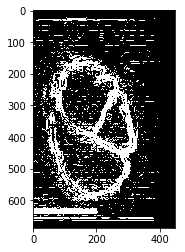

In [105]:
k, thres = cv2.threshold(edgeShape, 1, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(thres, cv2.COLOR_GRAY2RGB))

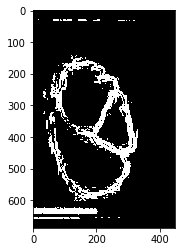

In [106]:
opening = cv2.morphologyEx(thres, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)),iterations=1)
plt.imshow(cv2.cvtColor(opening, cv2.COLOR_GRAY2RGB))

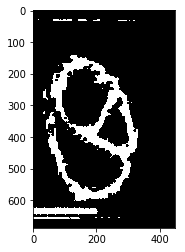

In [107]:
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)),iterations=2)
plt.imshow(cv2.cvtColor(closing, cv2.COLOR_GRAY2RGB))

erode = cv2.erode(closing, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)), iterations=1)
plt.imshow(cv2.cvtColor(erode, cv2.COLOR_GRAY2RGB))

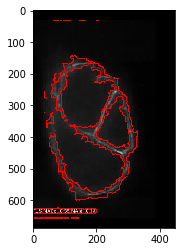

In [115]:
_ , contours, _ = cv2.findContours(erode, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(app1, contours, -1, (250, 0, 0),2)
plt.imshow(app1)

# Approach 2
Thresholding with lower limit **2** -> close(7x7) -> open(3x3)
#TODO:  Automate the lower limit and the kernal size 

Closing kernal of size 7 hinders the detection of small cells


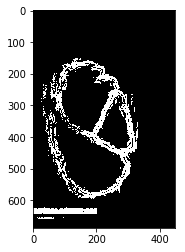

In [111]:
k, thres = cv2.threshold(edgeShape, 2, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(thres, cv2.COLOR_GRAY2RGB))

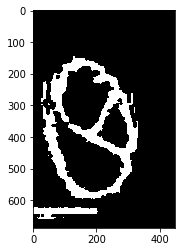

In [113]:
closing = cv2.morphologyEx(thres, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11)),iterations=1)
plt.imshow(cv2.cvtColor(closing, cv2.COLOR_GRAY2RGB))

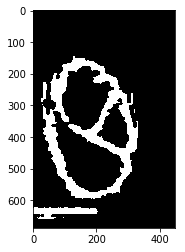

In [114]:
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)),iterations=1)
plt.imshow(cv2.cvtColor(opening, cv2.COLOR_GRAY2RGB))

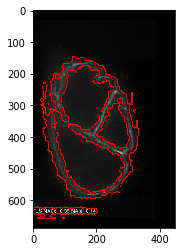

In [116]:
_ , contours, _ = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(app2, contours, -1, (250, 0, 0),2)
plt.imshow(app2)